In [30]:
import os
import pandas as pd
import numpy as np
pd.set_option("max_rows", 10)
np.set_printoptions(suppress=True)

from seaborn import set_style
set_style('darkgrid')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-notebook')
%matplotlib inline

In [2]:
#Training data
dta = pd.read_csv("adult.data.cleaned.csv.gz", compression="gzip")

#test data
test = pd.read_csv("adult.test.cleaned.csv.gz", compression="gzip")

In [3]:
#exploring the data
dta.head()

age         workclass  fnlwgt  education  education_num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital_status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital_gain  capital_loss  hours_per_week native_country income  
0          2174             0              40  United-States  <=50K  
1             0             0              13  United-States  <=50K  
2             0             0              40  United-States  <=50K  
3             0             0              40  United-States  <=50K  
4             0             0              40           Cuba  <=50K

In [4]:
dta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [5]:
dta.describe()

age          fnlwgt  education_num  capital_gain  \
count  32561.000000    32561.000000   32561.000000  32561.000000   
mean      38.581647   189778.366512      10.080679   1077.648844   
std       13.640433   105549.977697       2.572720   7385.292085   
min       17.000000    12285.000000       1.000000      0.000000   
25%       28.000000   117827.000000       9.000000      0.000000   
50%       37.000000   178356.000000      10.000000      0.000000   
75%       48.000000   237051.000000      12.000000      0.000000   
max       90.000000  1484705.000000      16.000000  99999.000000   

       capital_loss  hours_per_week  
count  32561.000000    32561.000000  
mean      87.303830       40.437456  
std      402.960219       12.347429  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356.000000       99.000000

In [6]:
dta.columns.difference(test.columns)

Index([], dtype='object')

In [7]:
dta.columns.equals(test.columns)

True

In [8]:
#indexing to return rows 5,10,15
dta.ix[[5,10,15]]

age workclass  fnlwgt     education  education_num      marital_status  \
5    37   Private  284582       Masters             14  Married-civ-spouse   
10   37   Private  280464  Some-college             10  Married-civ-spouse   
15   34   Private  245487       7th-8th              4  Married-civ-spouse   

          occupation relationship                race     sex  capital_gain  \
5    Exec-managerial         Wife               White  Female             0   
10   Exec-managerial      Husband               Black    Male             0   
15  Transport-moving      Husband  Amer-Indian-Eskimo    Male             0   

    capital_loss  hours_per_week native_country income  
5              0              40  United-States  <=50K  
10             0              80  United-States   >50K  
15             0              45         Mexico  <=50K

In [9]:
#selecting columns
dta[['workclass', 'education']]

workclass   education
0             State-gov   Bachelors
1      Self-emp-not-inc   Bachelors
2               Private     HS-grad
3               Private        11th
4               Private   Bachelors
...                 ...         ...
32556           Private  Assoc-acdm
32557           Private     HS-grad
32558           Private     HS-grad
32559           Private     HS-grad
32560      Self-emp-inc     HS-grad

[32561 rows x 2 columns]

In [10]:
type(dta[['workclass']])

pandas.core.frame.DataFrame

In [11]:
type(dta['workclass'])

pandas.core.series.Series

In [14]:
#selecting columns and rows
dta.ix[[5, 10, 15],['workclass', 'education']]

workclass     education
5    Private       Masters
10   Private  Some-college
15   Private       7th-8th

In [15]:
#groupby operations
dta.groupby("income").education.describe()

income        
<=50K   count         24720
        unique           16
        top         HS-grad
        freq           8826
>50K    count          7841
        unique           15
        top       Bachelors
        freq           2221
dtype: object

In [16]:
grouper = dta.groupby('education')
grouper

In [18]:
education_map = grouper.education_num.unique()
education_map.sort()

with pd.option_context("max_rows", 20):
    print education_map

education
Preschool        [1]
1st-4th          [2]
5th-6th          [3]
7th-8th          [4]
9th              [5]
10th             [6]
11th             [7]
12th             [8]
HS-grad          [9]
Some-college    [10]
Assoc-voc       [11]
Assoc-acdm      [12]
Bachelors       [13]
Masters         [14]
Prof-school     [15]
Doctorate       [16]
Name: education_num, dtype: object


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for for INPLACE sorting
  from ipykernel import kernelapp as app


In [23]:
#alternatively
education_map = grouper.education_num.apply(lambda x: x.unique()[0])
print education_map.sort_values()

education
Preschool       1
1st-4th         2
5th-6th         3
7th-8th         4
9th             5
               ..
Assoc-acdm     12
Bachelors      13
Masters        14
Prof-school    15
Doctorate      16
Name: education_num, dtype: int64


# Plotting

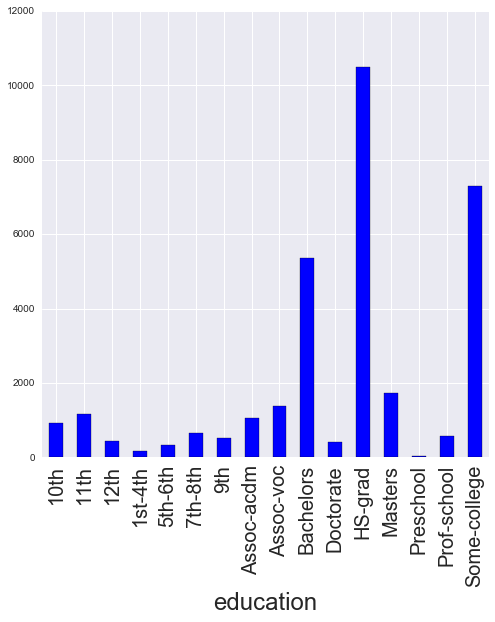

In [34]:
ax = dta.groupby("education").size().plot(kind="bar", figsize=(8, 8))
#ax.set_yticklabels([]) #turn off y ticks labels

#resize x label
xlabel = ax.xaxis.get_label()
xlabel.set_fontsize(24)

#resize x tick labels
labels = ax.xaxis.get_ticklabels()
[label.set_fontsize(20) for label in labels]
plt.show()

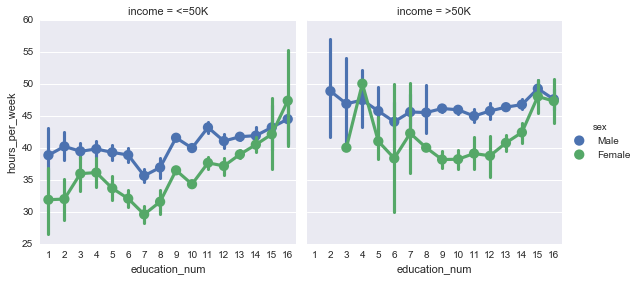

In [35]:
sns.factorplot("education_num", "hours_per_week", hue="sex", col="income", data=dta)

# Deleting columns

In [36]:
del dta['education']
del dta['fnlwgt']
del test['education']
del test['fnlwgt']

# Advanced indexing

In [38]:
dta.education_num <=8

0        False
1        False
2        False
3         True
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: education_num, dtype: bool

In [39]:
dta.ix[dta.education_num <=8, "education_num"]

3        7
6        5
15       4
18       7
22       5
        ..
32517    4
32522    7
32526    6
32535    8
32551    6
Name: education_num, dtype: int64

# iloc vs loc

In [40]:
dta.ix[dta.education_num <= 8, "education_num"].iloc[0]

7

In [41]:
dta.ix[dta.education_num <= 8, "education_num"].loc[3]

7

# Slicing with labels

In [42]:
dta.groupby("workclass").age.mean()

workclass
?                   40.960240
Federal-gov         42.590625
Local-gov           41.751075
Never-worked        20.571429
Private             36.797585
Self-emp-inc        46.017025
Self-emp-not-inc    44.969697
State-gov           39.436055
Without-pay         47.785714
Name: age, dtype: float64

In [43]:
dta.groupby("workclass").age.mean().ix["Federal-gov":"Private"]

workclass
Federal-gov     42.590625
Local-gov       41.751075
Never-worked    20.571429
Private         36.797585
Name: age, dtype: float64

# Working with categorical data

In [44]:
cat = pd.Categorical(dta.workclass)
cat.describe()

counts     freqs
categories                        
?                   1836  0.056386
Federal-gov          960  0.029483
Local-gov           2093  0.064279
Never-worked           7  0.000215
Private            22696  0.697030
Self-emp-inc        1116  0.034274
Self-emp-not-inc    2541  0.078038
State-gov           1298  0.039864
Without-pay           14  0.000430

In [45]:
cat

[State-gov, Self-emp-not-inc, Private, Private, Private, ..., Private, Private, Private, Private, Self-emp-inc]
Length: 32561
Categories (9, object): [?, Federal-gov, Local-gov, Never-worked, ..., Self-emp-inc, Self-emp-not-inc, State-gov, Without-pay]

In [46]:
cat.codes

array([7, 6, 4, ..., 4, 4, 5], dtype=int8)

In [48]:
# Vectorized string operations
dta.workclass.str.contains("\?")

0        False
1        False
2        False
3        False
4        False
         ...  
32556    False
32557    False
32558    False
32559    False
32560    False
Name: workclass, dtype: bool

In [49]:
dta.ix[dta.workclass.str.contains("\?"), "workclass"]

27       ?
61       ?
69       ?
77       ?
106      ?
        ..
32530    ?
32531    ?
32539    ?
32541    ?
32542    ?
Name: workclass, dtype: object

# Column Assignment 

In [50]:
dta.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

In [51]:
for col in dta:  #iterate through column names
    if not dta[col].dtype.kind=="O":  # only look at object types
        continue
    #replace "?" with "other"    
    if dta[col].str.contains("\?").any():
        dta.ix[dta[col].str.contains("\?"), col] = 'Other'
        test.ix[test[col].str.contains("\?"), col] = 'Other'

In [52]:
dta.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'Other', 'Self-emp-inc', 'Without-pay', 'Never-worked'], dtype=object)

# Replacing values using Dictionaries

In [53]:
dta.income

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: income, dtype: object

In [54]:
dta.income.replace({"<=50K":0, ">50K":1})

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, dtype: int64

In-place changes

In [55]:
dta.income.replace({"<=50K":0, ">50K":1}, inplace=True)

In [56]:
test.income.replace({"<=50K.": 0, ">50K.": 1}, inplace=True)

In [57]:
dta.income.mean()

0.2408095574460244

In [58]:
test.income.mean()

0.23622627602727106

Above we can see 25% of people are above 50k a year in training set

# Classification with Scikit Learn

# # Scikit-Learn API

- Base object is the estimator
- Any object that learns from data
- Classification, regression, clustering, or transformer
- parameters passed to estimator
estimator = Estimator(*args, **kwargs)
- fit method provided

estimator.fit(X, y)
- Computed parameters have an underscore appended

estimator.coef_

In [157]:
y = dta.pop("income")
Y_test = test.pop("income")

dta.info()

KeyError: 'income'

# Preprocessing
Preprocessing for Text, Categorical variables, Standardization etc.

In [60]:
from sklearn.preprocessing import LabelBinarizer

dta.native_country.head(15).values

array(['United-States', 'United-States', 'United-States', 'United-States',
       'Cuba', 'United-States', 'Jamaica', 'United-States',
       'United-States', 'United-States', 'United-States', 'India',
       'United-States', 'United-States', 'Other'], dtype=object)

In [61]:
binarizer = LabelBinarizer()

binarizer.fit_transform(dta.native_country.head(15))

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]])

In [62]:
binarizer.classes_

array(['Cuba', 'India', 'Jamaica', 'Other', 'United-States'], 
      dtype='|S13')

Preprocessing witha Pandas

In [63]:
X_train = pd.get_dummies(dta)
X_test  = pd.get_dummies(test)

Deal with real life

In [64]:
X_train.columns.equals(X_test.columns)

False

In [65]:
print(X_train.shape)
print(X_test.shape)

(32561, 91)
(16281, 90)


In [66]:
X_train.columns.difference(X_test.columns)

Index([u'native_country_Holand-Netherlands'], dtype='object')

In [68]:
X_test[X_train.columns.difference(X_test.columns)[0]] = 0

Preserve order

In [70]:
#rearranging columns to be on same order
X_test = X_test[X_train.columns]

In [72]:
X_train.head()

age  education_num  capital_gain  capital_loss  hours_per_week  \
0   39             13          2174             0              40   
1   50             13             0             0              13   
2   38              9             0             0              40   
3   53              7             0             0              40   
4   28             13             0             0              40   

   workclass_Federal-gov  workclass_Local-gov  workclass_Never-worked  \
0                      0                    0                       0   
1                      0                    0                       0   
2                      0                    0                       0   
3                      0                    0                       0   
4                      0                    0                       0   

   workclass_Other  workclass_Private            ...              \
0                0                  0            ...               
1                0                  0            ...               
2                0                  1            ...               
3                0                  1            ...               
4                0                  1            ...               

   native_country_Portugal  native_country_Puerto-Rico  \
0                        0                           0   
1                        0                           0   
2                        0                           0   
3                        0                           0   
4                        0                           0   

   native_country_Scotland  native_country_South  native_country_Taiwan  \
0                        0                     0                      0   
1                        0                     0                      0   
2                        0                     0                      0   
3                        0                     0                      0   
4                        0                     0                      0   

   native_country_Thailand  native_country_Trinadad&Tobago  \
0                        0                               0   
1                        0                               0   
2                        0                               0   
3                        0                               0   
4                        0                               0   

   native_country_United-States  native_country_Vietnam  \
0                             1                       0   
1                             1                       0   
2                             1                       0   
3                             1                       0   
4                             0                       0   

   native_country_Yugoslavia  
0                          0  
1                          0  
2                          0  
3                          0  
4                          0  

[5 rows x 91 columns]

# Reported Benchmarks
|    Algorithm               Error
| -- ----------------        -----
| 1  C4.5                    15.54
| 2  C4.5-auto               14.46
| 3  C4.5 rules              14.94
| 4  Voted ID3 (0.6)         15.64
| 5  Voted ID3 (0.8)         16.47
| 6  T2                      16.84
| 7  1R                      19.54
| 8  NBTree                  14.10
| 9  CN2                     16.00
| 10 HOODG                   14.82
| 11 FSS Naive Bayes         14.05
| 12 IDTM (Decision table)   14.46
| 13 Naive-Bayes             16.12
| 14 Nearest-neighbor (1)    21.42
| 15 Nearest-neighbor (3)    20.35
| 16 OC1                     15.04

# Classification and Regression Trees (CART)

- Partition feature space into a set of rectangles via splits that lead to largest information gain
- Fit simple model in each region (e.g., a constant)
- Captures non-linearities and feature interactions
- Note: not strictly necessary to dummy encode variables

In [145]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import pydot


In [146]:
dtree = DecisionTreeClassifier(random_state=0, max_depth=2)

dtree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [147]:
export_graphviz(dtree, feature_names=X_train.columns)

In [150]:
!dot -Tpng tree.dot -o tree.png

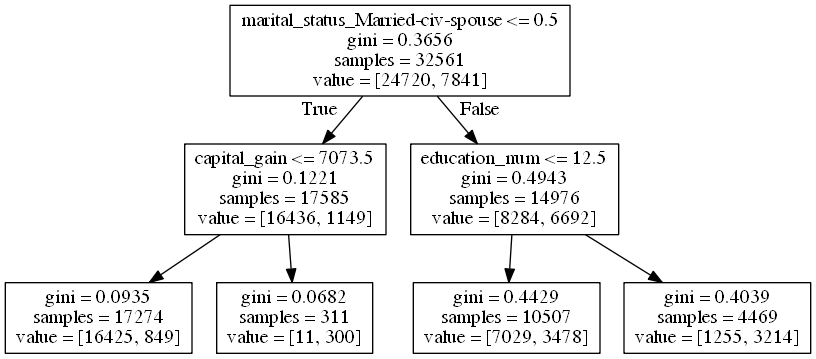

In [152]:
from IPython.display import Image
Image("tree.png", unconfined=True)

Fit the full tree and look at the error

In [153]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0)
dtree.fit(X_train, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

Performs slightly worse than C4.5 with no pruning

In [155]:
from sklearn import metrics

In [158]:
metrics.mean_absolute_error(Y_test, dtree.predict(X_test))

0.17689331122166943

Beware overfitting!

In [159]:
dtree = DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=10)
dtree.fit(X_train, y)
metrics.mean_absolute_error(Y_test, dtree.predict(X_test))

0.13911921872120878

# Aside: Saving Models
- All of the scikit-learn models are picklable
- Using joblib directly is often preferable to using pickle

In [161]:
import joblib

# Ensemble Methods
 # Boosting
- Combine many weak classifiers in to one strong one
- Weak classifier is slightly better than random
- Sequentially apply a classifier to repeatedly modified versions of data
- Each subsequent classifier improves on the mistakes of its predecessor
- For Boosting Trees, the classifier is a decision tree

In [162]:
# Create a random dataset

import numpy as np
rng = np.random.RandomState(1)
groundX = np.sort(rng.uniform(0, 10, size=250), axis=0)
groundy = np.linspace(1, -1, 250) + np.sin(2*groundX).ravel()
idx = np.random.randint(0, 250, size=30)
idx.sort()
XX = groundX[idx]
yy = groundy[idx]
XX = XX[:, np.newaxis]

In [163]:
from sklearn.tree import DecisionTreeRegressor
tree1 = DecisionTreeRegressor(max_depth=2)
tree1.fit(XX, yy)
y1 = tree1.predict(XX)

resid1 = yy - y1
tree1.fit(XX, resid1)

y2 = tree1.predict(XX)
resid2 = y2 - resid1
tree1.fit(XX, resid2)

y3 = tree1.predict(XX)

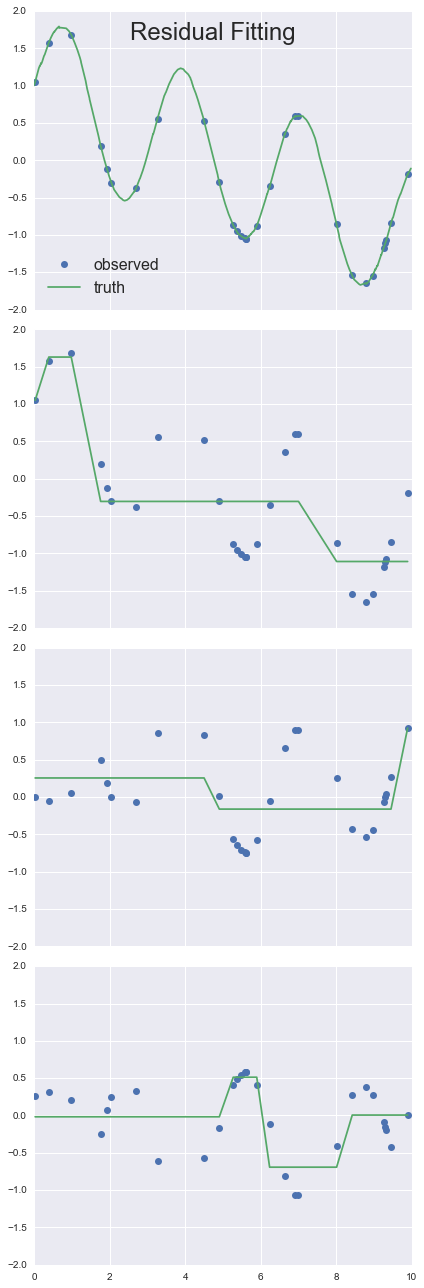

In [164]:
fig, ax = plt.subplots(4, 1, figsize=(6, 18), sharey=True, sharex=True)
ax[0].plot(XX, yy, marker='o', ls='', label='observed')
ax[0].plot(groundX, groundy, label='truth')
ax[0].legend(fontsize=16, loc='lower left');
ax[1].plot(XX, yy, marker='o', ls='')
ax[1].plot(XX, y1)
ax[2].plot(XX, resid1, marker='o', ls='')
ax[2].plot(XX, y2)
ax[3].plot(XX, resid2, marker='o', ls='')
ax[3].plot(XX, y3)
fig.suptitle("Residual Fitting", fontsize=24);
fig.tight_layout()

# Gradient Boosting
Generalizes boosting to any differentiable loss function

In [165]:
from sklearn.ensemble import GradientBoostingClassifier

In [168]:
if not os.path.exists("models\\gbt1.pkl"):
    gbt = GradientBoostingClassifier(max_depth=5, n_estimators=1000)
    gbt.fit(X_train, y)
    joblib.dump(gbt, "models\\gbt1.pkl")
else:
    gbt = joblib.load("models\\gbt1.pkl")

In [172]:
metrics.mean_absolute_error(Y_test, gbt.predict(X_test))

0.13088876604631164

In [173]:
if not os.path.exists("models\\gbt2.pkl"):
    gbt = GradientBoostingClassifier(max_depth=8, n_estimators=1000, subsample=.5, 
                                     random_state=0, learning_rate=.001)
    gbt.fit(X_train, y)
    joblib.dump(gbt, "models\\gbt2.pkl")
else:
    gbt = joblib.load("models\\gbt2.pkl")

In [174]:

metrics.mean_absolute_error(Y_test, gbt.predict(X_test))

0.14354155150175052

- Rule of thumb is that you can't really overfit with random forests
- This is true in general but only to an extent
- Usually ok to grow large forests with full depth trees (problem dependent)
- Limiting the depth of the trees and the number of trees can be

# Validation Methods
# Cross-Validation
Sampling techniques to ensure low generalization error and avoid overfitting

In [175]:
from sklearn.cross_validation import StratifiedKFold

cv = StratifiedKFold([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                      0, 0, 0, 0, 0, 0,], n_folds=3)
for idx in cv:
    print("train", idx[0], "test", idx[1])

('train', array([ 4,  5,  6,  7,  8,  9, 10, 13, 14, 15, 16]), 'test', array([ 0,  1,  2,  3, 11, 12]))
('train', array([ 0,  1,  2,  3,  8,  9, 10, 11, 12, 15, 16]), 'test', array([ 4,  5,  6,  7, 13, 14]))
('train', array([ 0,  1,  2,  3,  4,  5,  6,  7, 11, 12, 13, 14]), 'test', array([ 8,  9, 10, 15, 16]))


In [176]:
from sklearn.grid_search import GridSearchCV

cv = StratifiedKFold(y, n_folds=4)

params = {"max_depth": [3, 5, 7]}
gbt = GradientBoostingClassifier(n_estimators=500, learning_rate=.01)

if not os.path.exists("models\\grid_search.pkl"):
    estimator = GridSearchCV(gbt, param_grid=params, verbose=2)
    estimator.fit(X_train, y)
    joblib.dump(estimator, "models\\grid_search.pkl")
else:
    estimator = joblib.load("models\\grid_search.pkl")

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] max_depth=3 .....................................................
[CV] ............................................ max_depth=3 - 1.1min
[CV] max_depth=3 .....................................................
[CV] ............................................ max_depth=3 - 1.1min
[CV] max_depth=3 .....................................................
[CV] ............................................ max_depth=3 - 1.1min
[CV] max_depth=5 .....................................................
[CV] ............................................ max_depth=5 - 1.8min
[CV] max_depth=5 .....................................................
[CV] ............................................ max_depth=5 - 1.8min
[CV] max_depth=5 .....................................................
[CV] ............................................ max_depth=5 - 1.8min
[CV] max_depth=7 .....................................................
[CV] .............

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed: 16.9min finished


# Out-of-bag estimates and Early-stopping


In [177]:
gbt = GradientBoostingClassifier(learning_rate=.01, n_estimators=1000, subsample=.5, )

In [178]:
gbt.fit(X_train, y)

GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [179]:
metrics.mean_absolute_error(Y_test, gbt.predict(X_test))

0.13058165960321846

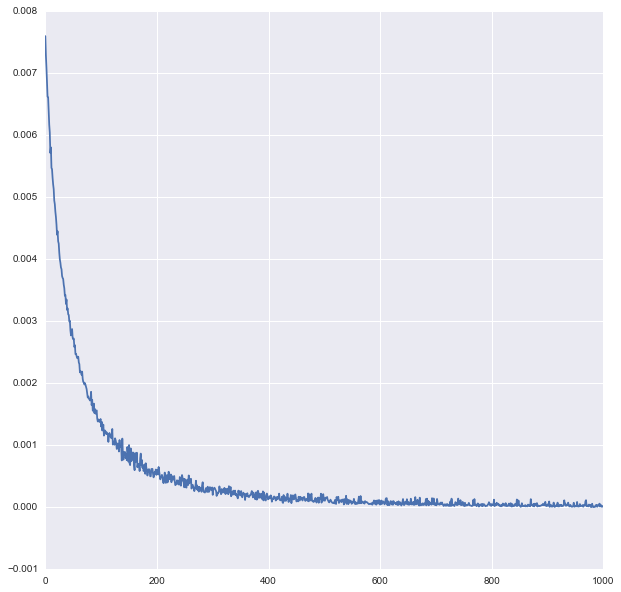

In [180]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(gbt.oob_improvement_)

Ad-hoc way to do early stopping

In [181]:
def monitor(i, self, local_variables):
    start = max(0, i - 4)
    stop = i + 1

    if i > 5 and np.mean(self.oob_improvement_[start:stop]) < 1e-4:
        print("Stopped at {}".format(i))
        return True

In [182]:
gbt.fit(X_train, y, monitor=monitor)

Stopped at 457


GradientBoostingClassifier(init=None, learning_rate=0.01, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=0.5, verbose=0,
              warm_start=False)

In [183]:
print(len(gbt.oob_improvement_))

458


# Custom Transformers

In [184]:
def get_obj_cols(dta, index=False):
    """
    dta : pd.DataFrame
    index : bool
        Whether to return column names or the numeric index.
        Default False, returns column names.
    """
    columns = dta.columns.tolist()
    obj_col_names = list(filter(lambda x : dta[x].dtype.kind == "O", 
                                columns))
    if not index:
        return obj_col_names
    else:
        return list(columns.index(col) for col in obj_col_names) 

In [185]:
obj_cols = get_obj_cols(dta)

for col in obj_cols:
    print(col)

workclass
marital_status
occupation
relationship
race
sex
native_country


Make a transformer that reliably transforms DataFrames and Arrays

In [186]:
from sklearn.base import TransformerMixin, BaseEstimator


class PandasTransformer(TransformerMixin, BaseEstimator):
    def __init__(self, dataframe):
        self.columns = dataframe.columns
        self.obj_columns = get_obj_cols(dataframe, index=True)
        obj_index = np.zeros(dataframe.shape[1], dtype=bool)
        obj_index[self.obj_columns] = True
        self.obj_index = obj_index
        
        
    def fit(self, X, y=None):
        X = np.asarray(X)
        # create the binarizer transforms
        _transformers = {}
        for col in self.obj_columns:
            _transformers.update({col: LabelBinarizer().fit(X[:, col])})
        
        self._transformers = _transformers
        return self
    
    def transform(self, X, y=None):
        X = np.asarray(X)
        
        dummies = None
        for col in self.obj_columns:
            if dummies is None:
                dummies = self._transformers[col].transform(X[:, col])
            else:
                new_dummy = self._transformers[col].transform(X[:, col])
                dummies = np.column_stack((dummies, new_dummy))
            
        # remove original columns
        X = X[:, ~self.obj_index]
        
        X = np.column_stack((X, dummies))
        
        return X

# Pipelines
Often it makes sense to do the data transformation, feature extraction, etc. as part of a Pipeline
Pipelines are flexible and provide the same sklearn API

In [187]:
from sklearn.pipeline import Pipeline

In [188]:
dtree_estimator = Pipeline([('transformer', PandasTransformer(dta)), 
                            ('dtree', dtree)])

In [189]:
dtree_estimator.fit(dta, y)

Pipeline(steps=[('transformer', PandasTransformer(dataframe=None)), ('dtree', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'))])

In [190]:
dtree_estimator.named_steps['dtree']

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [191]:
dtree_estimator.predict_proba(test)

array([[ 0.99773157,  0.00226843],
       [ 0.82638889,  0.17361111],
       [ 0.71442401,  0.28557599],
       ..., 
       [ 0.30779392,  0.69220608],
       [ 0.82244898,  0.17755102],
       [ 0.19209809,  0.80790191]])